In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

Veriseti içerisinde herhangi bir boş değer olup olmadığını kontrol ediyoruz.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# **Preprocess**

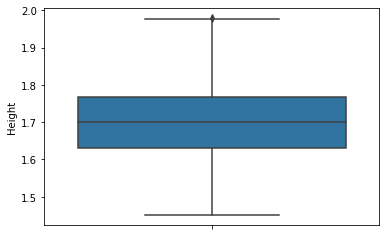

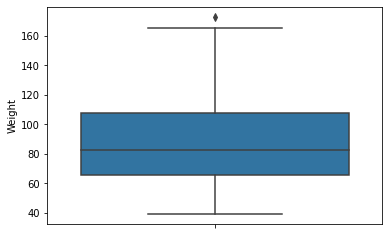

After remove Outliers


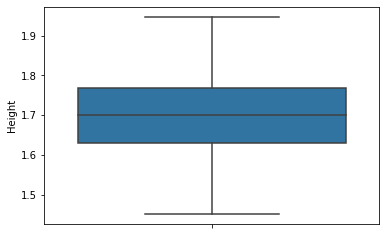

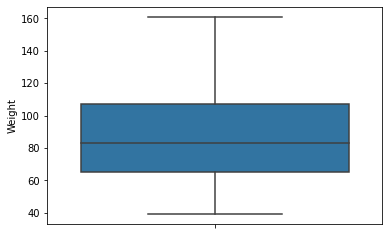

In [ ]:
sns.boxplot(y=df["Height"]);
plt.show()
sns.boxplot(y=df["Weight"]);
plt.show()

# We remove the outliers.
df = df[df['Weight'] < 165]
df = df[df['Height'] < 1.95]

print('After remove Outliers')

sns.boxplot(y=df["Height"]);
plt.show()
sns.boxplot(y=df["Weight"]);
plt.show()

## **BMI Düzenleme**

In [ ]:
bmi_array = []
for index, row in df.iterrows():
    bmi = round(row['Weight'] / (row['Height'] * row['Height']), 2)
    bmi_array.append(bmi)

bmi_class = []
for bmi in bmi_array:
    if bmi < 18.5:
        bmi_class.append('Insufficient_Weight')
    elif bmi > 18.5 and bmi < 25:
        bmi_class.append('Normal_Weight')
    elif bmi >= 25 and bmi < 30:
        bmi_class.append('Overweight')
    elif bmi >= 30 and bmi < 35:
        bmi_class.append('Obesity_Type_I')
    elif bmi >= 35 and bmi < 40:
        bmi_class.append('Obesity_Type_II')
    else:
        bmi_class.append('Obesity_Type_III')

df.insert(2, 'BMI', bmi_array)
df.insert(2, 'BMI_TYPE', bmi_class)

df.drop(['NObeyesdad'], axis=1, inplace=True)

df.head()

Gender   Age       BMI_TYPE    BMI  Height  Weight  \
0  Female  21.0  Normal_Weight  24.39    1.62    64.0   
1  Female  21.0  Normal_Weight  24.24    1.52    56.0   
2    Male  23.0  Normal_Weight  23.77    1.80    77.0   
3    Male  27.0     Overweight  26.85    1.80    87.0   
4    Male  22.0     Overweight  28.34    1.78    89.8   

  family_history_with_overweight FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  \
0                            yes   no   2.0  3.0  Sometimes    no   2.0   no   
1                            yes   no   3.0  3.0  Sometimes   yes   3.0  yes   
2                            yes   no   2.0  3.0  Sometimes    no   2.0   no   
3                             no   no   3.0  3.0  Sometimes    no   2.0   no   
4                             no   no   2.0  1.0  Sometimes    no   2.0   no   

   FAF  TUE        CALC                 MTRANS  
0  0.0  1.0          no  Public_Transportation  
1  3.0  0.0   Sometimes  Public_Transportation  
2  2.0  1.0  Frequently  Public_Transportation  
3  2.0  0.0  Frequently                Walking  
4  0.0  0.0   Sometimes  Public_Transportation

## **Data İnceleme - Categorical**

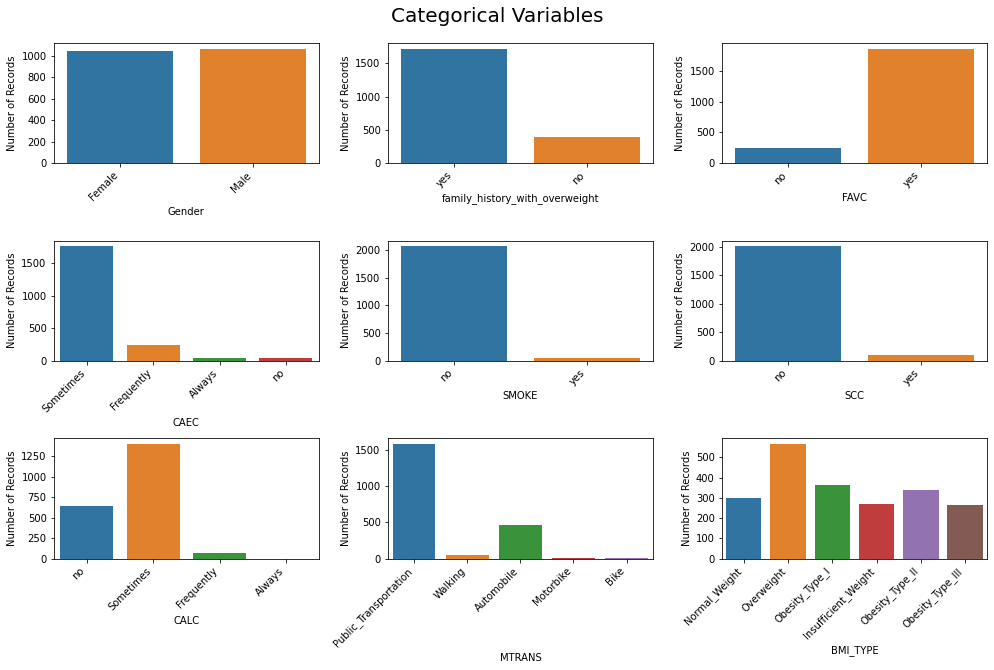

In [ ]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'BMI_TYPE']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col],ax=subplot)
    subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=df[col].explode().unique() ) 
    subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=1, h_pad=1)
plt.show()

## **Data İnceleme - Ordinal**

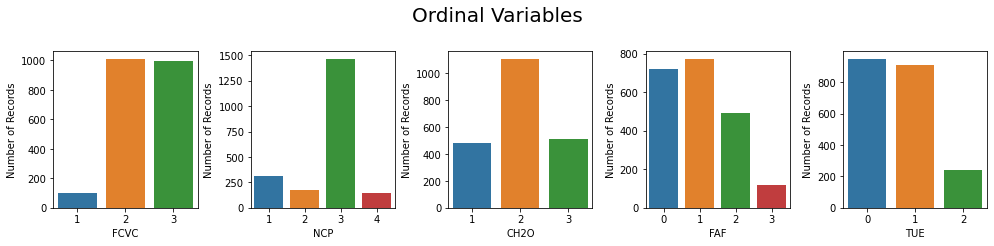

In [ ]:
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

# convert to int / nearest int value
for col in columns:
    df[col] = round(df[col]).astype('int')  

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

## **Age İnceleme**

In [ ]:
df["Age"].describe()

count    2107.000000
mean       24.320601
std         6.349038
min        14.000000
25%        19.947192
50%        22.804818
75%        26.000000
max        61.000000
Name: Age, dtype: float64

No handles with labels found to put in legend.


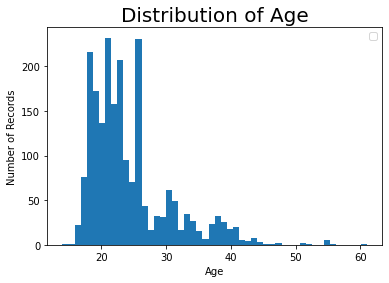

In [ ]:
plt.hist(df['Age'], bins = "auto")
    
plt.xlabel("Age")
plt.ylabel("Number of Records")
plt.legend()
plt.title("Distribution of Age", fontsize=20)
plt.show()

## **Weight İnceleme**

In [ ]:
df["Weight"].describe()

count    2107.000000
mean       86.473379
std        26.068077
min        39.000000
25%        65.393941
50%        82.967937
75%       107.066802
max       160.935351
Name: Weight, dtype: float64

No handles with labels found to put in legend.


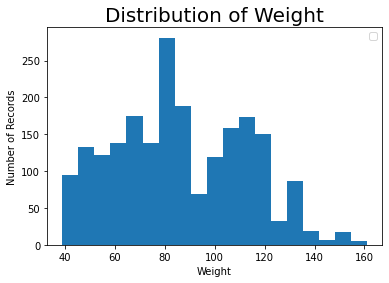

In [ ]:
plt.hist(df['Weight'], bins = "auto")
    
plt.xlabel("Weight")
plt.ylabel("Number of Records")
plt.legend()
plt.title("Distribution of Weight", fontsize=20)
plt.show()

## **Height İnceleme**

In [ ]:
df["Height"].describe()

count    2107.000000
mean        1.701268
std         0.092880
min         1.450000
25%         1.630000
50%         1.700181
75%         1.768019
max         1.947406
Name: Height, dtype: float64

No handles with labels found to put in legend.


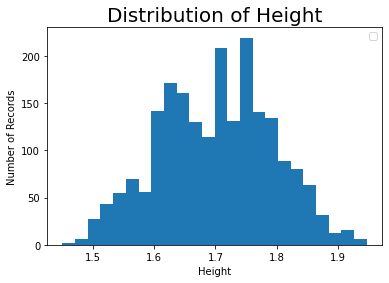

In [ ]:
plt.hist(df['Height'], bins = "auto")
    
plt.xlabel("Height")
plt.ylabel("Number of Records")
plt.legend()
plt.title("Distribution of Height", fontsize=20)
plt.show()

# **Bivarite Analysis**

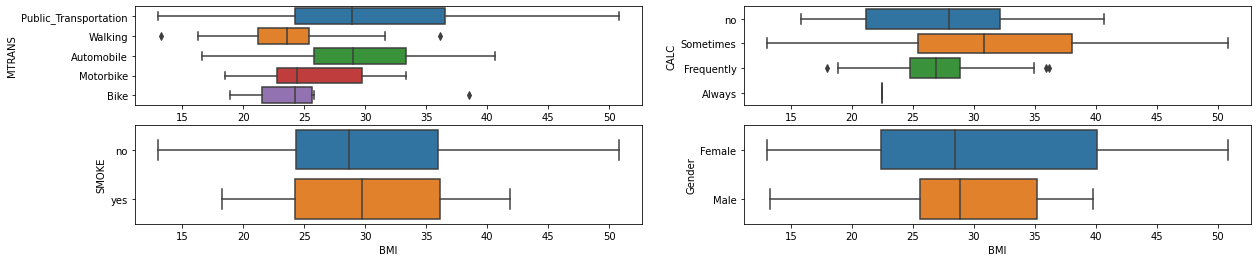

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(221)
sns.boxplot(x = df.BMI, y = df.MTRANS)
plt.subplot(222)
sns.boxplot(x = df.BMI, y = df.CALC)
plt.subplot(223)
sns.boxplot(x = df.BMI, y = df.SMOKE)
plt.subplot(224)
sns.boxplot(x = df.BMI, y = df.Gender)
plt.tight_layout(pad=50, w_pad=15, h_pad=15)
plt.show()

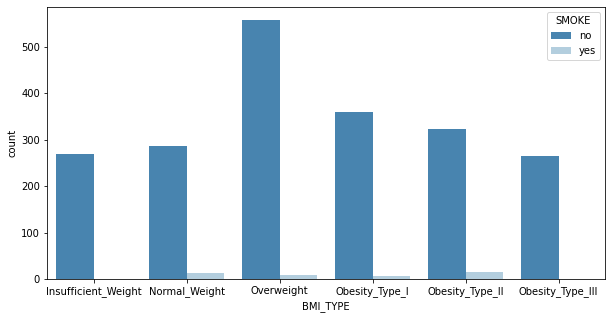

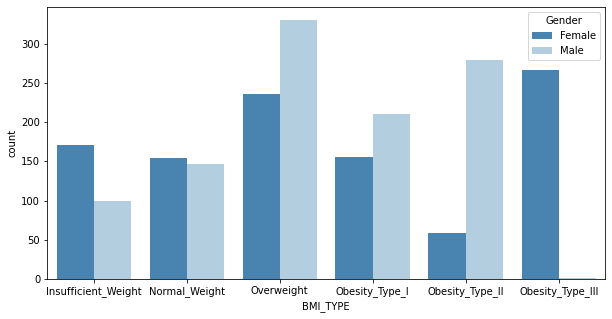

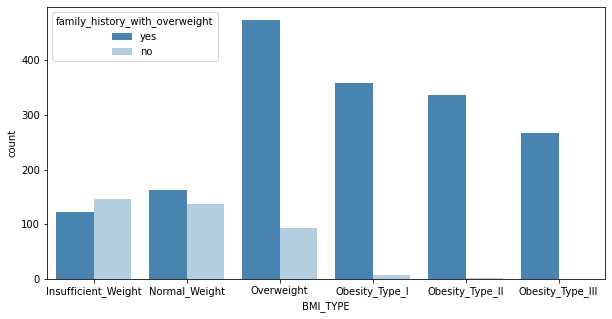

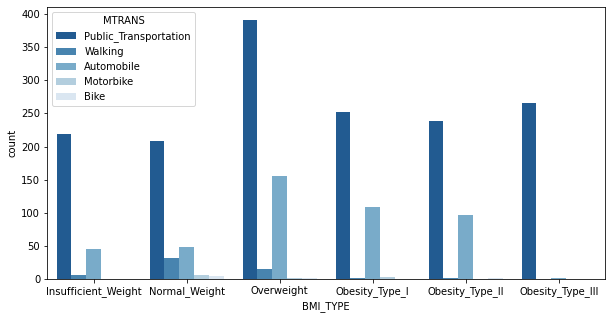

In [ ]:
order = ["Insufficient_Weight", "Normal_Weight", "Overweight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
ref = "BMI_TYPE"
palette = "Blues_r"

hues = ["SMOKE", 'Gender', "family_history_with_overweight", "MTRANS"]

for hue in hues:
  plt.figure(figsize = (10, 5))
  sns.countplot(x = ref, hue = hue, data = df, order = order, palette = palette)
  plt.show()

# **Correlation**

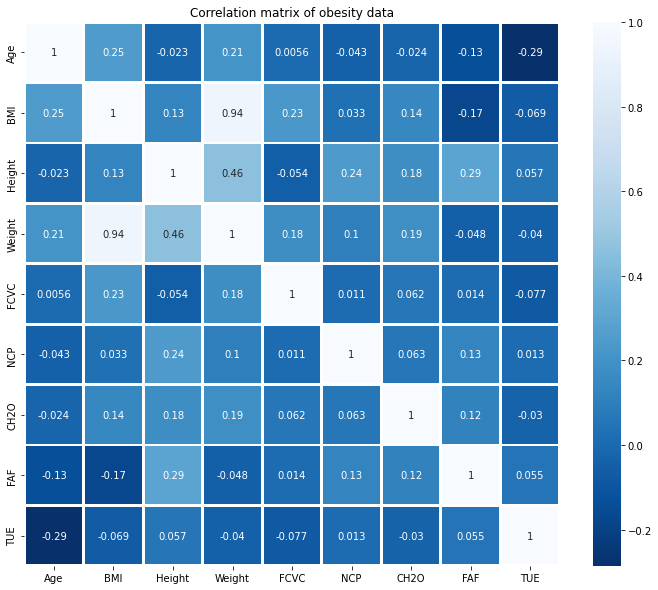

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

# **Prepare Data for ML**

In [ ]:
df_backup = df.copy()
df_backup['Gender'] = df_backup['Gender'].map({'Male': 1.0,'Female': 0.0})

df.drop(['Weight'], axis=1, inplace=True)
df.drop(['Height'], axis=1, inplace=True)
df.drop(['BMI'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)
df.drop(['Gender'], axis=1, inplace=True)

df.head()

BMI_TYPE family_history_with_overweight FAVC  FCVC  NCP       CAEC  \
0  Normal_Weight                            yes   no     2    3  Sometimes   
1  Normal_Weight                            yes   no     3    3  Sometimes   
2  Normal_Weight                            yes   no     2    3  Sometimes   
3     Overweight                             no   no     3    3  Sometimes   
4     Overweight                             no   no     2    1  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  
0    no     2   no    0    1          no  Public_Transportation  
1   yes     3  yes    3    0   Sometimes  Public_Transportation  
2    no     2   no    2    1  Frequently  Public_Transportation  
3    no     2   no    2    0  Frequently                Walking  
4    no     2   no    0    0   Sometimes  Public_Transportation

In [ ]:
df['FCVC'] = df['FCVC'].astype(float)
df['NCP'] = df['NCP'].astype(float)
df['CH2O'] = df['CH2O'].astype(float)
df['FAF'] = df['FAF'].astype(float)
df['TUE'] = df['TUE'].astype(float)

df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1.0,'no': 0.0})
df['FAVC'] = df['FAVC'].map({'yes': 1.0,'no': 0.0})
df['CAEC'] = df['CAEC'].map({'no': 0.0,'Sometimes': 0.5, 'Frequently': 0.7,'Always': 1.0})
df['SMOKE'] = df['SMOKE'].map({'yes': 1.0,'no': 0.0})
df['SCC'] = df['SCC'].map({'yes': 1.0,'no': 0.0})
df['CALC'] = df['CALC'].map({'no': 0.0,'Sometimes': 0.5, 'Frequently': 0.7,'Always': 1.0})
#df['MTRANS'] = df['MTRANS'].map({'Automobile': 1.0,'Motorbike': 2.0, 'Bike': 3.0,'Public_Transportation': 4.0, 'Walking': 5.0})
#df['BMI_TYPE'] = df['BMI_TYPE'].map({'Insufficient_Weight': 1.0,'Normal_Weight': 2.0, 'Overweight': 3.0,'Obesity_Type_I': 4.0,'Obesity_Type_II': 5.0, 'Obesity_Type_III': 6.0})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BMI_TYPE                        2107 non-null   object 
 1   family_history_with_overweight  2107 non-null   float64
 2   FAVC                            2107 non-null   float64
 3   FCVC                            2107 non-null   float64
 4   NCP                             2107 non-null   float64
 5   CAEC                            2107 non-null   float64
 6   SMOKE                           2107 non-null   float64
 7   CH2O                            2107 non-null   float64
 8   SCC                             2107 non-null   float64
 9   FAF                             2107 non-null   float64
 10  TUE                             2107 non-null   float64
 11  CALC                            2107 non-null   float64
 12  MTRANS                          21

In [ ]:
df_target = df['BMI_TYPE'].values
df_features = df.drop(['BMI_TYPE'], axis=1)

In [ ]:
df_features = pd.get_dummies(df_features, prefix=['MTRANS'], columns=['MTRANS'])
feature_cols = df_features.columns.values.tolist()

# **Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
# step of deciding on the number of components
pca_temp = PCA()
principalComponents = pca_temp.fit_transform(df_features)
print(np.cumsum((pca_temp.explained_variance_ratio_)))

[0.24795921 0.42327191 0.56299692 0.69522802 0.79619393 0.87948821
 0.92347625 0.95028402 0.96515153 0.97646816 0.98692187 0.99265133
 0.99689426 0.99892482 1.         1.        ]


In [ ]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_features)

# **Feature Importance**

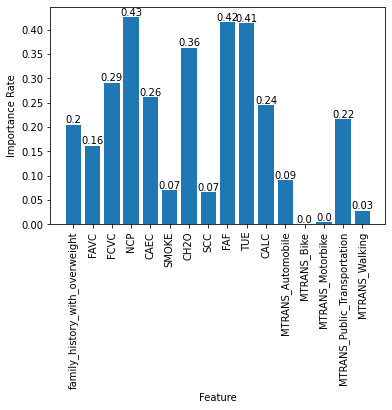

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize

# define the model
model = DecisionTreeClassifier()

# fit the model
model = model.fit(df_features, df_target)

# get importance
importance = model.feature_importances_

n = list(df_features.columns)
s = normalize([importance.tolist()])[0]
line = plt.bar(n,s)
plt.xlabel('Feature')
plt.ylabel("Importance Rate")

for i in range(len(s)):
    plt.annotate(str(round(s[i], 2)), xy=(n[i],s[i]), ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.show()

# **Find GINI**

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('obesity_gini.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.688455 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.688455 to fit



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# important features

important_features_df = df[['NCP','FAF','CH2O','TUE']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features_df, df_target, test_size=0.3, random_state=3)
print ('Train set Imp Fea:', X_train_imp.shape,  y_train_imp.shape)
print ('Test set Imp Fea:', X_test_imp.shape,  y_test_imp.shape)

# Split for PCA

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, df_target, test_size=0.1, random_state=3)
print ('Train set PCA:', X_train_pca.shape,  y_train_pca.shape)
print ('Test set PCA:', X_test_pca.shape,  y_test_pca.shape)

Train set: (1474, 16) (1474,)
Test set: (633, 16) (633,)
Train set Imp Fea: (1474, 4) (1474,)
Test set Imp Fea: (633, 4) (633,)
Train set PCA: (1896, 5) (1896,)
Test set PCA: (211, 5) (211,)


# **Naive Bayes Classifier**

Test set Accuracy:  0.353870458135861


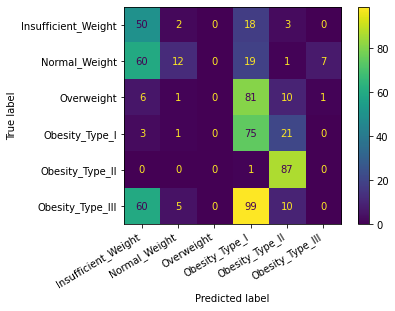

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Training
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predicting
yhat=(clf.predict(X_test))

# Accuracy evaluation
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## Gradual Accuracy

In [ ]:
acc = 0

for i in range(len(yhat)):
  if yhat[i] == y_test[i]:
    acc += 1
  elif (order.index(yhat[i]) == order.index(y_test[i])+1) or (order.index(yhat[i]) == order.index(y_test[i])-1) :
    acc += 0.5

result = acc / len(yhat)

print('Gradual accuracy is:{}'.format(result))

Gradual accuracy is:0.49447077409162715


## Important Features Based

                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.14      0.22        73
      Normal_Weight       1.00      0.01      0.02        99
     Obesity_Type_I       0.40      0.02      0.04        99
    Obesity_Type_II       0.60      0.03      0.06       100
   Obesity_Type_III       0.20      1.00      0.33        88
         Overweight       0.36      0.32      0.34       174

           accuracy                           0.25       633
          macro avg       0.53      0.25      0.17       633
       weighted avg       0.51      0.25      0.18       633

Test set Accuracy:  0.2527646129541864


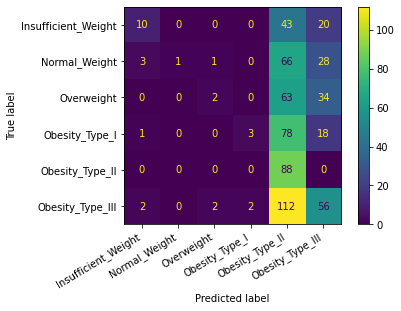

In [ ]:
# Training
clf = GaussianNB()
clf.fit(X_train_imp, y_train_imp)

# Predicting
yhat=clf.predict(X_test_imp)

# Accuracy evaluation
print(classification_report(y_test_imp, yhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, yhat))

plot_confusion_matrix(clf, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Principle Component Analysis**

                     precision    recall  f1-score   support

Insufficient_Weight       0.33      0.16      0.22        25
      Normal_Weight       0.20      0.06      0.10        31
     Obesity_Type_I       0.29      0.06      0.10        33
    Obesity_Type_II       0.34      0.41      0.37        34
   Obesity_Type_III       0.54      0.84      0.66        31
         Overweight       0.38      0.61      0.47        57

           accuracy                           0.39       211
          macro avg       0.35      0.36      0.32       211
       weighted avg       0.35      0.39      0.34       211

Test set Accuracy:  0.3933649289099526


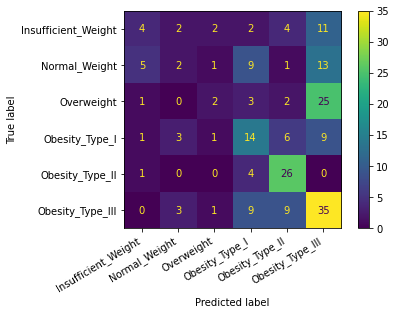

In [ ]:
# Training
clf = GaussianNB()
clf.fit(X_train_pca, y_train_pca)

# Predicting
yhat=clf.predict(X_test_pca)

# Accuracy evaluation
print(classification_report(y_test_pca, yhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, yhat))

plot_confusion_matrix(clf, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

# **K Nearest Neighbour**

                     precision    recall  f1-score   support

Insufficient_Weight       0.49      0.64      0.56        73
      Normal_Weight       0.38      0.33      0.35        99
     Obesity_Type_I       0.52      0.60      0.55        99
    Obesity_Type_II       0.60      0.68      0.64       100
   Obesity_Type_III       0.80      0.86      0.83        88
         Overweight       0.57      0.43      0.49       174

           accuracy                           0.56       633
          macro avg       0.56      0.59      0.57       633
       weighted avg       0.56      0.56      0.56       633

Test set Accuracy:  0.5639810426540285


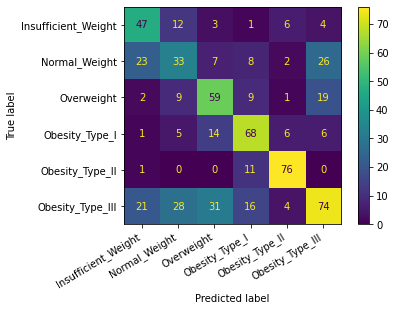

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train, y_train)

# Predicting the Test set results
khat = knnclf.predict(X_test)
#Evaluating the Algorithm
print(classification_report(y_test, khat))
print("Test set Accuracy: ", accuracy_score(y_test, khat))

plot_confusion_matrix(knnclf, X_test, y_test, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## Gradual Accuracy

In [ ]:
acc = 0

for i in range(len(khat)):
  if khat[i] == y_test[i]:
    acc += 1
  elif (order.index(khat[i]) == order.index(y_test[i])+1) or (order.index(khat[i]) == order.index(y_test[i])-1) :
    acc += 0.5

result = acc / len(khat)

print('Gradual accuracy is:{}'.format(result))

Gradual accuracy is:0.7053712480252765


## **Important Feature Based**

                     precision    recall  f1-score   support

Insufficient_Weight       0.22      0.49      0.30        73
      Normal_Weight       0.22      0.24      0.23        99
     Obesity_Type_I       0.22      0.21      0.22        99
    Obesity_Type_II       0.53      0.10      0.17       100
   Obesity_Type_III       0.45      0.59      0.51        88
         Overweight       0.37      0.28      0.32       174

           accuracy                           0.30       633
          macro avg       0.34      0.32      0.29       633
       weighted avg       0.34      0.30      0.29       633

Test set Accuracy:  0.3033175355450237


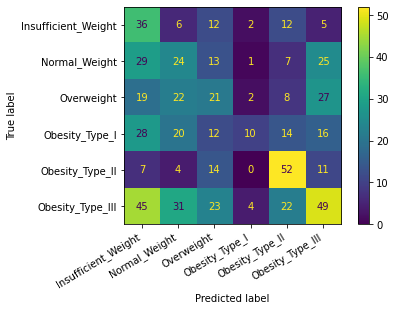

In [ ]:
# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train_imp, y_train_imp)

# Predicting the Test set results
khat = knnclf.predict(X_test_imp)
#Evaluating the Algorithm
print(classification_report(y_test_imp, khat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, khat))

plot_confusion_matrix(knnclf, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Principle Component Analysis**

                     precision    recall  f1-score   support

Insufficient_Weight       0.54      0.60      0.57        25
      Normal_Weight       0.32      0.26      0.29        31
     Obesity_Type_I       0.48      0.64      0.55        33
    Obesity_Type_II       0.60      0.62      0.61        34
   Obesity_Type_III       0.72      0.74      0.73        31
         Overweight       0.53      0.44      0.48        57

           accuracy                           0.54       211
          macro avg       0.53      0.55      0.54       211
       weighted avg       0.53      0.54      0.53       211

Test set Accuracy:  0.5355450236966824


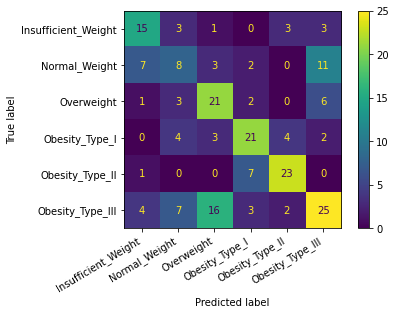

In [ ]:
# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train_pca, y_train_pca)

# Predicting the Test set results
khat = knnclf.predict(X_test_pca)
#Evaluating the Algorithm
print(classification_report(y_test_pca, khat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, khat))

plot_confusion_matrix(knnclf, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

# **Random Forest Classification**

                     precision    recall  f1-score   support

Insufficient_Weight       0.67      0.74      0.70        73
      Normal_Weight       0.61      0.46      0.53        99
     Obesity_Type_I       0.60      0.60      0.60        99
    Obesity_Type_II       0.62      0.71      0.66       100
   Obesity_Type_III       0.81      0.92      0.86        88
         Overweight       0.65      0.61      0.63       174

           accuracy                           0.66       633
          macro avg       0.66      0.67      0.66       633
       weighted avg       0.66      0.66      0.66       633

Test set Accuracy:  0.660347551342812


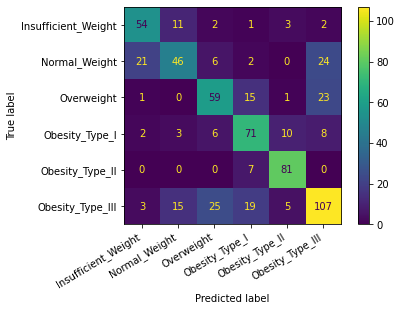

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train, y_train)

rhat = rfc.predict(X_test)

print(classification_report(y_test, rhat))
print("Test set Accuracy: ", accuracy_score(y_test, rhat))

plot_confusion_matrix(rfc, X_test, y_test, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## Gradual Accuracy

In [ ]:
acc = 0

for i in range(len(rhat)):
  if rhat[i] == y_test[i]:
    acc += 1
  elif (order.index(rhat[i]) == order.index(y_test[i])+1) or (order.index(rhat[i]) == order.index(y_test[i])-1) :
    acc += 0.5

result = acc / len(rhat)

print('Gradual accuracy is:{}'.format(result))

Gradual accuracy is:0.7843601895734598


## **Important Feature Based**

                     precision    recall  f1-score   support

Insufficient_Weight       0.43      0.30      0.35        73
      Normal_Weight       0.24      0.11      0.15        99
     Obesity_Type_I       0.39      0.25      0.31        99
    Obesity_Type_II       0.32      0.58      0.41       100
   Obesity_Type_III       0.61      0.67      0.64        88
         Overweight       0.39      0.43      0.41       174

           accuracy                           0.39       633
          macro avg       0.40      0.39      0.38       633
       weighted avg       0.39      0.39      0.38       633

Test set Accuracy:  0.3949447077409163


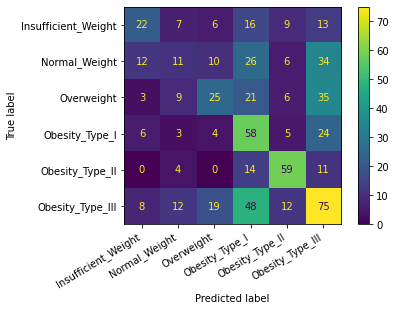

In [ ]:
rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train_imp, y_train_imp)

rhat = rfc.predict(X_test_imp)

print(classification_report(y_test_imp, rhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, rhat))

plot_confusion_matrix(rfc, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Principle Component Analysis**

                     precision    recall  f1-score   support

Insufficient_Weight       0.67      0.64      0.65        25
      Normal_Weight       0.41      0.23      0.29        31
     Obesity_Type_I       0.61      0.67      0.64        33
    Obesity_Type_II       0.58      0.74      0.65        34
   Obesity_Type_III       0.71      0.87      0.78        31
         Overweight       0.57      0.53      0.55        57

           accuracy                           0.60       211
          macro avg       0.59      0.61      0.59       211
       weighted avg       0.59      0.60      0.59       211

Test set Accuracy:  0.6018957345971564


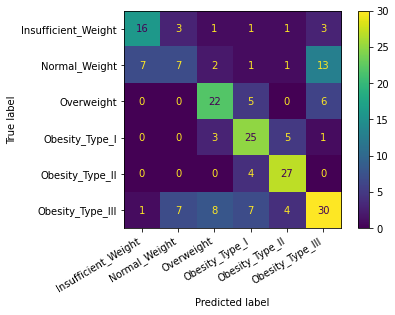

In [ ]:
rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train_pca, y_train_pca)

rhat = rfc.predict(X_test_pca)

print(classification_report(y_test_pca, rhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, rhat))

plot_confusion_matrix(rfc, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

# **Support Vector Machines**

                     precision    recall  f1-score   support

Insufficient_Weight       0.51      0.62      0.56        73
      Normal_Weight       0.49      0.21      0.30        99
     Obesity_Type_I       0.57      0.26      0.36        99
    Obesity_Type_II       0.48      0.43      0.45       100
   Obesity_Type_III       0.64      0.89      0.75        88
         Overweight       0.44      0.61      0.51       174

           accuracy                           0.51       633
          macro avg       0.52      0.50      0.49       633
       weighted avg       0.51      0.51      0.48       633

Test set Accuracy:  0.5055292259083728


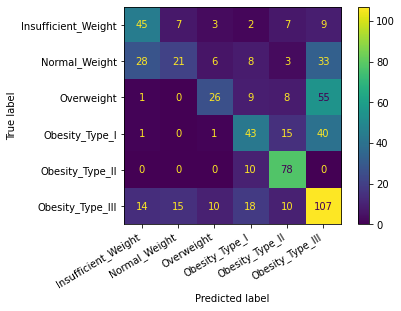

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

svmhat = svm.predict(X_test)

print(classification_report(y_test, svmhat))
print("Test set Accuracy: ", accuracy_score(y_test, svmhat))

plot_confusion_matrix(svm, X_test, y_test, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Gradual Accuracy**

In [ ]:
acc = 0

for i in range(len(svmhat)):
  if svmhat[i] == y_test[i]:
    acc += 1
  elif (order.index(svmhat[i]) == order.index(y_test[i])+1) or (order.index(svmhat[i]) == order.index(y_test[i])-1) :
    acc += 0.5

result = acc / len(svmhat)

print('Gradual accuracy is:{}'.format(result))

Gradual accuracy is:0.6500789889415481


## **Important Feature Based**

                     precision    recall  f1-score   support

Insufficient_Weight       0.49      0.25      0.33        73
      Normal_Weight       0.30      0.03      0.06        99
     Obesity_Type_I       0.36      0.10      0.16        99
    Obesity_Type_II       0.29      0.42      0.35       100
   Obesity_Type_III       0.61      0.51      0.56        88
         Overweight       0.31      0.61      0.41       174

           accuracy                           0.35       633
          macro avg       0.39      0.32      0.31       633
       weighted avg       0.38      0.35      0.32       633

Test set Accuracy:  0.353870458135861


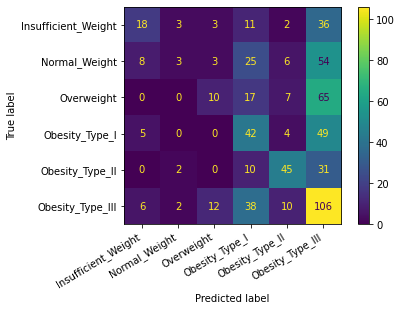

In [ ]:
svm = SVC()
svm.fit(X_train_imp, y_train_imp)

svmhat = svm.predict(X_test_imp)

print(classification_report(y_test_imp, svmhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, svmhat))

plot_confusion_matrix(svm, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Principle Component Analysis**

                     precision    recall  f1-score   support

Insufficient_Weight       0.45      0.36      0.40        25
      Normal_Weight       0.40      0.06      0.11        31
     Obesity_Type_I       0.47      0.27      0.35        33
    Obesity_Type_II       0.53      0.59      0.56        34
   Obesity_Type_III       0.60      0.87      0.71        31
         Overweight       0.37      0.54      0.44        57

           accuracy                           0.46       211
          macro avg       0.47      0.45      0.43       211
       weighted avg       0.46      0.46      0.43       211

Test set Accuracy:  0.46445497630331756


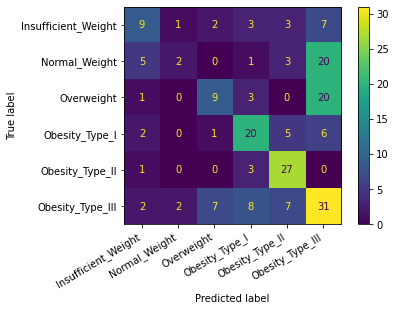

In [ ]:
svm = SVC()
svm.fit(X_train_pca, y_train_pca)

svmhat = svm.predict(X_test_pca)

print(classification_report(y_test_pca, svmhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, svmhat))

plot_confusion_matrix(svm, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

# **Decision Tree Classifier**

                     precision    recall  f1-score   support

Insufficient_Weight       0.61      0.67      0.64        73
      Normal_Weight       0.48      0.35      0.41        99
     Obesity_Type_I       0.51      0.71      0.59        99
    Obesity_Type_II       0.58      0.71      0.64       100
   Obesity_Type_III       0.82      0.85      0.84        88
         Overweight       0.64      0.47      0.54       174

           accuracy                           0.60       633
          macro avg       0.61      0.63      0.61       633
       weighted avg       0.61      0.60      0.60       633

Test set Accuracy:  0.6034755134281201


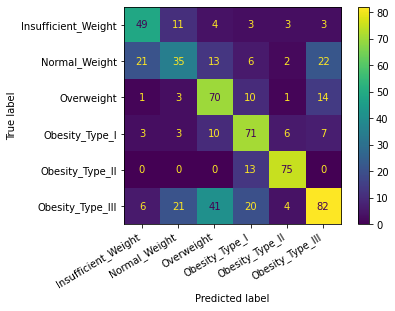

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

dhat = classifier.predict(X_test)

#Evaluating the Algorithm
print(classification_report(y_test, dhat))
print("Test set Accuracy: ", accuracy_score(y_test, dhat))

plot_confusion_matrix(classifier, X_test, y_test, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Gradual Accuracy**

In [ ]:
acc = 0

for i in range(len(dhat)):
  if dhat[i] == y_test[i]:
    acc += 1
  elif (order.index(dhat[i]) == order.index(y_test[i])+1) or (order.index(dhat[i]) == order.index(y_test[i])-1) :
    acc += 0.5

result = acc / len(dhat)

print('Gradual accuracy is:{}'.format(result))

Gradual accuracy is:0.7369668246445498


## **Important Feature Based**

                     precision    recall  f1-score   support

Insufficient_Weight       0.43      0.36      0.39        73
      Normal_Weight       0.24      0.11      0.15        99
     Obesity_Type_I       0.36      0.27      0.31        99
    Obesity_Type_II       0.32      0.59      0.42       100
   Obesity_Type_III       0.61      0.67      0.64        88
         Overweight       0.40      0.40      0.40       174

           accuracy                           0.40       633
          macro avg       0.39      0.40      0.38       633
       weighted avg       0.39      0.40      0.38       633

Test set Accuracy:  0.39652448657187994


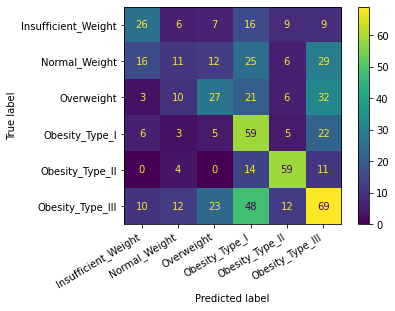

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_imp, y_train_imp)

dhat = classifier.predict(X_test_imp)

#Evaluating the Algorithm
print(classification_report(y_test_imp, dhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, dhat))

plot_confusion_matrix(classifier, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

## **Principle Component Analysis**

                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.64      0.67        25
      Normal_Weight       0.33      0.19      0.24        31
     Obesity_Type_I       0.55      0.67      0.60        33
    Obesity_Type_II       0.48      0.71      0.57        34
   Obesity_Type_III       0.77      0.74      0.75        31
         Overweight       0.54      0.47      0.50        57

           accuracy                           0.56       211
          macro avg       0.56      0.57      0.56       211
       weighted avg       0.55      0.56      0.55       211

Test set Accuracy:  0.5592417061611374


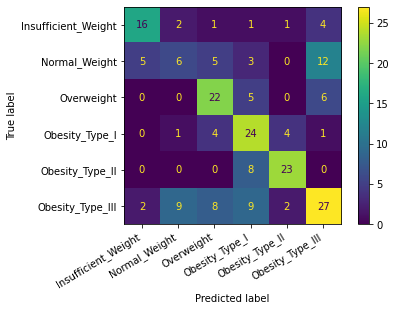

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_pca, y_train_pca)

dhat = classifier.predict(X_test_pca)

#Evaluating the Algorithm
print(classification_report(y_test_pca, dhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, dhat))

plot_confusion_matrix(classifier, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(6), order, ha='right', rotation=31)
plt.yticks(range(6), order)
plt.show()

# **K - Means Clustering**

## Based On BMI - Age

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

X = df_backup[['Age', 'BMI']]
X_ord = df_backup[['NCP', 'FAF']]

kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X)

metrics.rand_score(df_target, y_kmeans)

0.8103653042744958

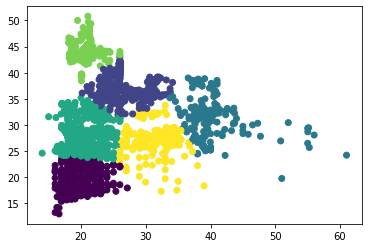

In [ ]:
plt.scatter(X['Age'].values, X['BMI'].values, c=y_kmeans)
plt.show()

## Based On NCP - FAF

In [ ]:
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X_ord)

metrics.rand_score(df_target, y_kmeans)

0.6895042122063163

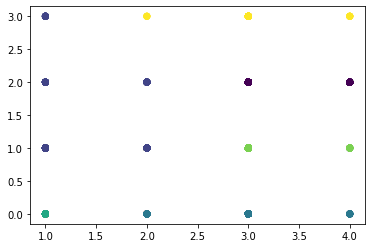

In [ ]:
plt.scatter(X_ord['NCP'].values, X_ord['FAF'].values, c=y_kmeans)
plt.show()

# **Hierarchical Clustering**

## Based On BMI - Age

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(X)

metrics.rand_score(df_target, y_hc)

0.7729888748714884

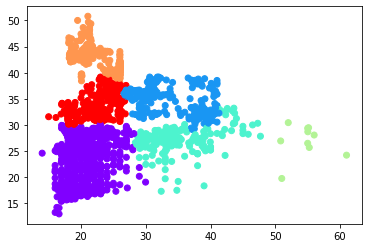

In [ ]:
plt.scatter(X['Age'].values, X['BMI'].values, c=y_hc, cmap='rainbow')
plt.show()

## Based On NCP - FAF

In [ ]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(X_ord)

metrics.rand_score(df_target, y_hc)

0.6235814142790888

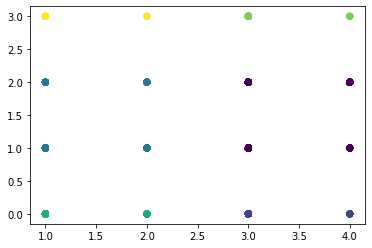

In [ ]:
plt.scatter(X_ord['NCP'].values, X_ord['FAF'].values, c=y_hc)
plt.show()

# **Agglomerative Clustering**

## Based On BMI - Age

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 6)
clusters = agg.fit_predict(X)

metrics.rand_score(df_target, clusters)

0.7845155951468243

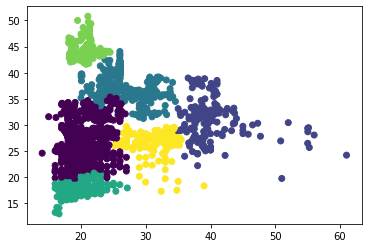

In [ ]:
plt.scatter(X['Age'].values, X['BMI'].values, c=clusters)
plt.show()

## Based On NCP - FAF

In [ ]:
agg = AgglomerativeClustering(n_clusters = 6)
clusters = agg.fit_predict(X_ord)

metrics.rand_score(df_target, clusters)

0.6859115209059838

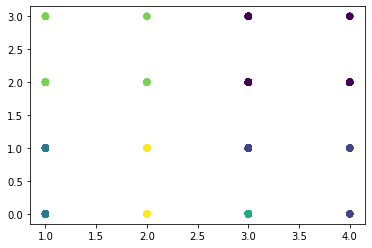

In [ ]:
plt.scatter(X_ord['NCP'].values, X_ord['FAF'].values, c=clusters)
plt.show()

# **Result Tabel For Classification Accuracy**

| Method | Normal Acc | Gradual Acc | Important Feature Acc | PCA |
| --- | --- | --- | --- | --- |
| Naive Bayes | 0.35 | 0.49 | 0.25 | 0.39
| K Nearest Neighbour | 0.56 | 0.70 | 0.30 | 0.53
| Random Forest | 0.66 | 0.78 | 0.39 | 0.60
| Support Vector Machine | 0.50 | 0.65 | 0.35 | 0.46
| Decision Tree | 0.60 | 0.73 | 0.39 | 0.55

> Best Classification Method: **Random Forest Classification**


# **Result Tabel For Clustering Accuracy**

| Method | BMI - Age Accuracy | NCP - FAF Accuracy |
| --- | --- | --- |
| K - Means | 0.810 | 0.689
| Hierarchical | 0.773 | 0.623
| Agglomerative | 0.784 | 0.686

> Best Clustering Method: **K - Means Clustering**